In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install sentence-transformers datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install datasets


In [ ]:
import pandas as pd

df = pd.read_csv("/content/employee_given_feedback.csv")

In [ ]:
df.head()

,sentence,label
0,I've learned a lot from the great leadership a...,positive
1,I'm disappointed by long hours and feeling bur...,negative
2,It's great working with the flexible hours and...,positive
3,Always impressed by the time autonomy and reas...,positive
4,I feel a bit challenged working with poor lead...,negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  4200 non-null   object
 1   label     4200 non-null   object
dtypes: object(2)
memory usage: 65.8+ KB


In [ ]:
df['label'].value_counts()

,count
label,
positive,2100
negative,2100


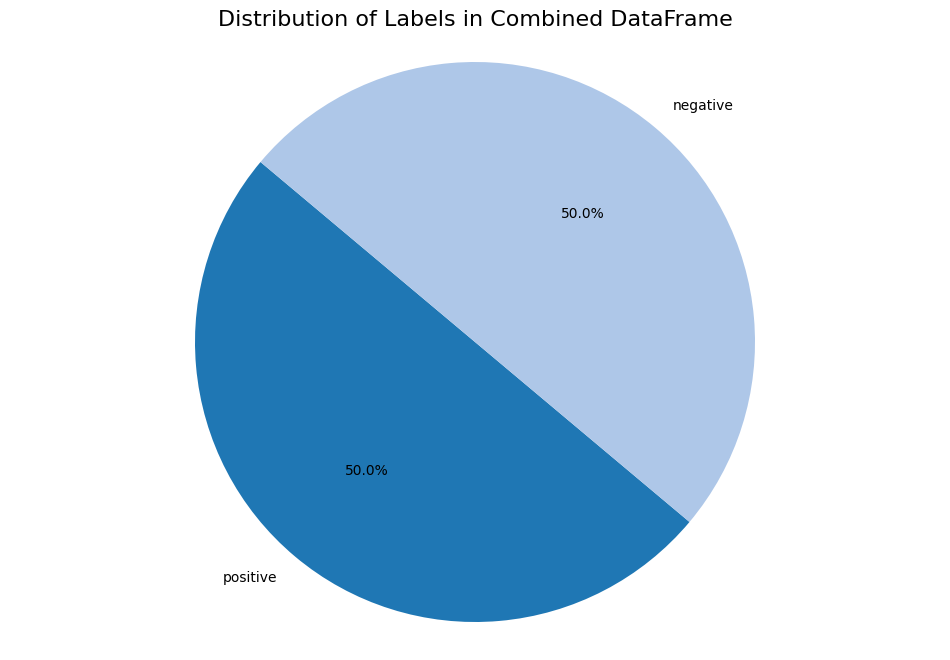

In [ ]:
import matplotlib.pyplot as plt

# Plotting a pie chart for label distribution
label_counts = df['label'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Labels in Combined DataFrame', fontsize=16)
plt.axis('equal')  # Equal aspect ratio to ensure the pie is drawn as a circle
plt.show()


<ipython-input-8-f0868f46b01d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=label_counts.index, x=label_counts.values, palette='viridis', orient='h')


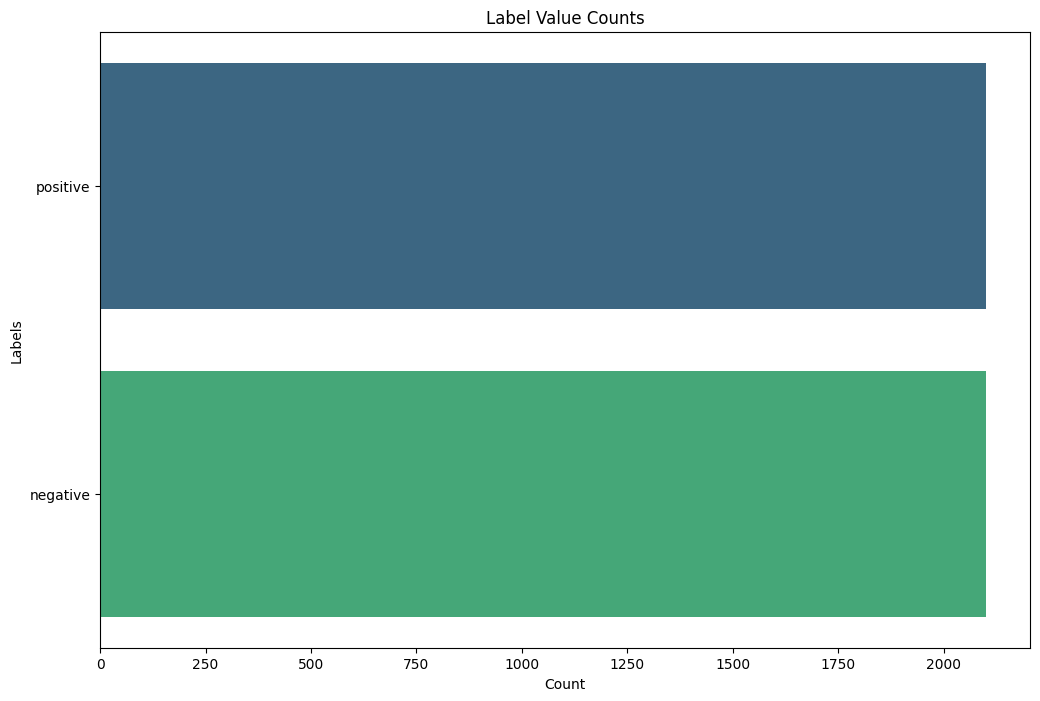

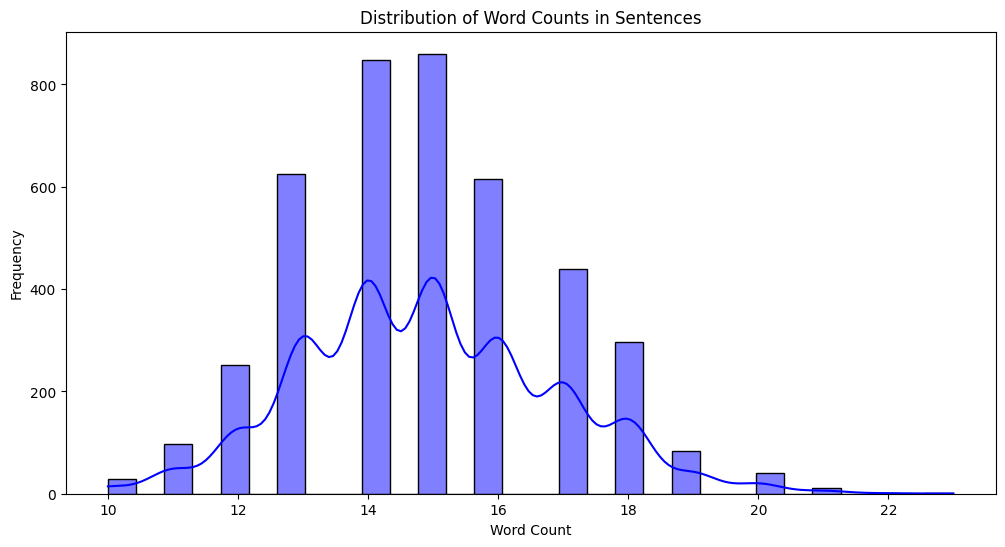

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['label'].value_counts()
# Plot the label value counts with horizontal bars (labels on y-axis)
plt.figure(figsize=(12, 8))  # Increased height for better label display
sns.barplot(y=label_counts.index, x=label_counts.values, palette='viridis', orient='h')
plt.title('Label Value Counts')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

# Calculate word count for each sentence and create a new column
df['word_count'] = df['sentence'].apply(lambda x: len(x.split()))

# Plot word count distribution (no change for this plot)
plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Word Counts in Sentences')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to a single column
df['label'] = le.fit_transform(df['label'])

In [ ]:
le.classes_

array(['negative', 'positive'], dtype=object)

In [ ]:
df.head(10)

,sentence,label,word_count
0,I've learned a lot from the great leadership a...,1,15
1,I'm disappointed by long hours and feeling bur...,0,15
2,It's great working with the flexible hours and...,1,17
3,Always impressed by the time autonomy and reas...,1,14
4,I feel a bit challenged working with poor lead...,0,18
5,I'm grateful for the bonuses and great insuran...,1,13
6,Unhappy with lack of mental health and wellnes...,0,13
7,I've noticed issues with long hours and feelin...,0,14
8,Sometimes it's hard to align with a cliquish t...,0,16
9,I admire the bonuses and great insurance optio...,1,12


In [ ]:
df.drop("word_count",axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df['sentence'],df['label'],test_size=0.5,random_state=50,stratify=df['label'])

In [ ]:
print("Training Samples",len(x_train))
print("Testing Samples",len(x_test))

Training Samples 2100
Testing Samples 2100


In [ ]:
x_train[:5],y_train[:5]

(3612    It's great working with the flexible hours and...
 668     I've noticed issues with lack of mental health...
 3867    I really appreciate the wellness programs and ...
 2992    Often frustrated due to lack of mental health ...
 1616    There are moments where not being appreciated ...
 Name: sentence, dtype: object,
 3612    1
 668     0
 3867    1
 2992    0
 1616    0
 Name: label, dtype: int64)

In [ ]:
unique_labels=np.unique(y_train)
unique_labels

array([0, 1])

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["sentence"], truncation=True)

In [ ]:
from datasets import Dataset
train_df = pd.DataFrame({'sentence': x_train, 'label': y_train})
train_dataset = Dataset.from_pandas(train_df)
test_df = pd.DataFrame({'sentence': x_test, 'label': y_test})
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
# del x_train,x_test,y_train,y_test,df_1,train_df

In [ ]:
emotions = [
    'negative','positive'
]

# Create mappings
id2label = {i: label for i, label in enumerate(emotions)}
label2id = {label: i for i, label in enumerate(emotions)}

# Print results
print("id2label:", id2label)
print("label2id:", label2id)


id2label: {0: 'negative', 1: 'positive'}
label2id: {'negative': 0, 'positive': 1}


In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2100 [00:00<?, ? examples/s]

Map:   0%|          | 0/2100 [00:00<?, ? examples/s]

In [ ]:
# del train_dataset,test_dataset

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install evaluate

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "True"

In [ ]:
from transformers import EarlyStoppingCallback
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
    report_to="tensorboard",  # Enables tensorboard logging
    logging_dir='./logs',  # Path to store logs
    logging_steps=100,  # Log every 100 steps
)



trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    # tokenizer=tokenizer,  # optional, good for saving
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

history = trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy
1,0.114400,0.001715,1.000000
2,0.001900,0.000574,1.000000
3,0.000800,0.000299,1.000000
4,0.000300,0.000192,1.000000
5,0.000200,0.000137,1.000000
6,0.000200,0.000106,1.000000
7,0.000100,0.000087,1.000000
8,0.000100,0.000076,1.000000
9,0.000100,0.000070,1.000000
10,0.000100,0.000068,1.000000


In [ ]:
evaluate.load("f1")
evaluate.load("precision")
evaluate.load("recall")


EvaluationModule(name: "recall", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
- **predictions** (`list` of `int`): The predicted labels.
- **references** (`list` of `int`): The ground truth labels.
- **labels** (`list` of `int`): The set of labels to include when `average` is not set to `binary`, and their order when average is `None`. Labels present in the data can be excluded in this input, for example to calculate a multiclass average ignoring a majority negative class, while labels not present in the data will result in 0 components in a macro average. For multilabel targets, labels are column indices. By default, all labels in y_true and y_pred are used in sorted order. Defaults to None.
- **pos_label** (`int`): The class label to use as the 'positive class' when calculating the recall. Defaults to `1`.
- **average** (`string`): This parameter is required for multiclass/multilabel tar

In [ ]:
trainer.evaluate()


{'eval_loss': 6.80315206409432e-05,
 'eval_accuracy': 1.0,
 'eval_runtime': 1.8364,
 'eval_samples_per_second': 1143.562,
 'eval_steps_per_second': 71.881,
 'epoch': 10.0}

In [ ]:
print(history)

TrainOutput(global_step=2370, training_loss=0.005397540517249597, metrics={'train_runtime': 188.2267, 'train_samples_per_second': 200.822, 'train_steps_per_second': 12.591, 'total_flos': 250002202818192.0, 'train_loss': 0.005397540517249597, 'epoch': 10.0})


In [ ]:
save_path='/content/drive/MyDrive/DistilBERTEmpGivenFeedback_90_10'
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

('/content/drive/MyDrive/DistilBERTEmpGivenFeedback_90_10/tokenizer_config.json',
 '/content/drive/MyDrive/DistilBERTEmpGivenFeedback_90_10/special_tokens_map.json',
 '/content/drive/MyDrive/DistilBERTEmpGivenFeedback_90_10/vocab.txt',
 '/content/drive/MyDrive/DistilBERTEmpGivenFeedback_90_10/added_tokens.json',
 '/content/drive/MyDrive/DistilBERTEmpGivenFeedback_90_10/tokenizer.json')

In [ ]:
# text="that game hurt"#sadness
text="i am feeling hesitated beacuse they give so much pressure" #gratitude

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(save_path)
inputs = tokenizer(text, return_tensors="pt")

In [ ]:
from transformers import AutoModelForSequenceClassification
import torch

model = AutoModelForSequenceClassification.from_pretrained(save_path)
with torch.no_grad():
    logits = model(**inputs).logits

In [ ]:
predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

'negative'